# Chapter 6: Machine Learning -------- Part B1

    6 | Overview
        6.1 What is Machine Learning?
        6.2 Scikit-Learn
        6.3 Supervised Learning: Classification
        6.4 Supervised Learning: Regression
        6.5 Unsupervised Learning: Dimension Reduction
        6.6 Unsupervised Learning: Clustering

### In this part we will only focus on 6.3

## 6.3: Supervised Learning - Classification

## Naive Bayes Classification: 

    Classification with Naive Bayes
    
    ▪ Naive Bayes (NB) models: extremely fast and simple classification algorithms, few tunable parameters
        → very useful as a quick-and-dirty baseline for a classification problem 
    ▪ often suitable for very high-dimensional datasets
    ▪ make stringent (strict) assumptions about data
        → Gaussian Naive Bayes: assumption is that data from each label is drawn from a simple Gaussian   distribution
        → Multinomial Naive Bayes: features are assumed to be generated from a simple multinomial distribution


    Advantages of Naive Bayes algorithms
    
    ▪ are extremely fast for both training and prediction 
    ▪ provide straightforward probabilistic prediction
    ▪ are often very easily interpretable
    ▪ have very few (if any) tunable parameters
    
    When to Use Naive Bayes
    ▪ Naive Bayes classifiers tend to perform especially well ...
        → when the naive assumptions actually match the data (very rare in practice)
        → for very well-separated categories, when model complexity is less important 
        → for very high-dimensional data, when model complexity is less important
    ▪ stringent assumptions about data → NB will generally not perform as well as a more complicated model
    
### Naive Bayes in action : Diagnosing Breast Cancer

In [135]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer

In [85]:
# load the Wisconsin breast cancer dataset

wbcd = pd.read_csv('/Users/abdulhabirkarahanli/Desktop/Data/wisc_bc_data.csv')
wbcd.head()

# split into features and target, dropping ID column. The reason is that ID is unique indentifier and our 
# goal is to predict diagnosis based on the other data columns that we have. Every time if we have ID columns,
# we should drop it once we are in machine learning. 

X = wbcd.drop(['id', 'diagnosis'], axis=1)
y = wbcd['diagnosis']

# scale data (i.e., zero mean and unit variance). Data should have same scales.
from sklearn.preprocessing import StandardScaler # or import MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train/test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42) #0.3 means 70 percent of 
# our data for the training and 30% for the testing. How good our model is performing?

# train Gaussian NB model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()    # instantiate model
model.fit(Xtrain, ytrain)   # fit model to data

# GaussianNB(priors=None, var_smoothing=1e-09)
y_model = model.predict(Xtest)   # predict on new data. We have to evaluate the model. 

## Notes: Evaluating classification models

    Model performance: Confusion matrix (crosstable)
    
    ▪ True Positives (TP): actual is true, prediction is true (→ correct pred.)
    ▪ True Negatives (TN): actual is false, predicted is false (→ correct pred.)
    ▪ False Positives (FP): actual is false, predicted is true (→ incorrect pred.) 
    ▪ False Negatives (FN): actual is true, predicted is false (→ incorrect pred.)
        → sklearn.metrics.confusion_matrix(y_true, y_pred)
        
    1. Model performance: Accuracy
    
    ▪ good measure when outcome classes in the data are nearly balanced 
    ▪ should not be used when outcome classes are a majority of one class
        → sklearn.metrics.accuracy_score(y_true, y_pred)
        
    2. Model performance: Precision
    ▪ performance with respect to false positives: how many true positives did we caught? 
        → if focus on minimizing FPs: high precision desirable
    → sklearn.metrics.precision_score(y_true, y_pred)
    
    3. Model performance: Recall or Sensitivity
    ▪ performance with respect to false negatives: how many true positives did we miss? 
        → if focus on minimizing FNs: high recall desirable
    → sklearn.metrics.recall_score(y_true, y_pred)
    
    4. Model performance: Specificity
    ▪ opposite of recall
    ▪ performance with respect to false positives: how many true negatives did we miss?
    → no pre-defined function in scikit-learn (i. e., computation has to be performed manually from confusion matrix)

In [86]:
# Evaluating model performance: Confusion matrix
# Continue to our example: 
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_model, labels=["M", "B"]) 
# Almost every cases are correctly classified whether being malignent or begign. 
# we have 2 false positive and 7 false negatives

array([[ 59,   2],
       [  7, 103]])

In [87]:
# What is the overall accuracy? 

res = confusion_matrix(ytest, y_model, labels=["M", "B"])
(res[0, 0] + res[1, 1]) / res.sum()   # TP + TN / overall. 

# So our model is 94% percent accurate which is pretty good model. We can check it with directly estimate accuracy:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # it gives, of course, the same result as in above. 

0.9473684210526315

In [88]:
# Naive Benchmarks: 

    # What would have happened if we always predicted benign (i.e., our test would be broken)?
    
(res[1, 0] + res[1, 1]) / res.sum() 

# if we have dont have a perfect balanced dataset, it is important to check Naive Benchmark. 

0.6432748538011696

## Evaluating classification models: Plotting the confusion matrix

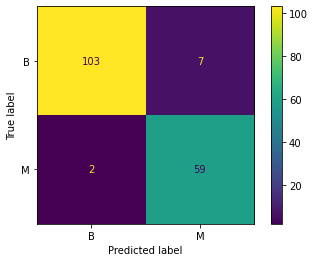

In [89]:
# easier way to evaluate performance: plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=model, X=Xtest, y_true=ytest)
plt.show()

    ▪ confusion matrix can show normalized values with respect to true values ( 'true' ),
    predicted values ( 'pred' ), or as overall percentage ( 'all' )

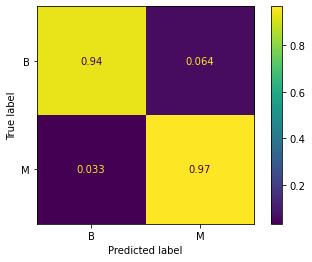

In [90]:
# plot confusion matrix with values normalized w.r.t. the true values

plot_confusion_matrix(estimator=model, X=Xtest, y_true=ytest, normalize='true')
plt.show()  #it shows the percentage wrt to the true vales

## Exercise
    → Use the votes.csv dataset.
         → The dataset contains the voting behavior of congressmen on 16 key votes as well as their
          political affiliation.
    → Train a Naive Bayes classifier that predicts to which party a congressman belongs based on the 16 key votes. How good is your machine learning model?
 
     

In [91]:
votes = pd.read_csv('/Users/abdulhabirkarahanli/Desktop/Data/votes.csv')
votes 



,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


In [94]:
# Split into fearures and target. Our goal is to predict the voters which class they belong to? 
X1 = votes.drop(['Class'], axis=1)
y1 = votes['Class'] #target


# Replace the Nans with mean value
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X1)
X2

# Scale data
X2 = scaler.fit_transform(X2)

# train/test split
X2train, X2test, y1train, y1test = train_test_split(X2, y1, test_size=0.3, random_state=42)

# train Guassian NB model
model = GaussianNB()  # instantiate model 
model.fit(X2train, y1train) # fit model to data

## GaussianNB()
y_model = model.predict(X2test)  # predict on new data

In [98]:
accuracy_score(y1test, y_model)    # my model is highly accurate

0.9389312977099237

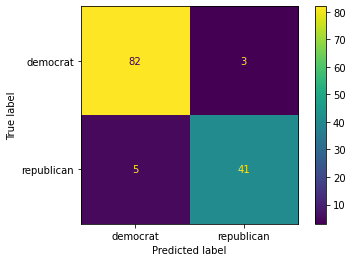

In [100]:
# Plot

plot_confusion_matrix(estimator=model, X=X2test, y_true=y1test)
plt.show()

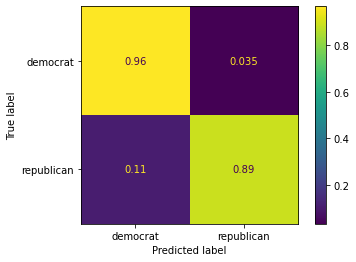

In [109]:
# Lets see what is the % of our model's accuracy? 

plot_confusion_matrix(estimator=model, X=X2test, y_true=y1test, normalize='true')
plt.show()

# Exercise is successfully finished!

### Decision Trees: Random Forests

#### Random Forests in Action:

In [117]:
# we use the breast cancer data from before: 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=12345) #instantiate model
model_rf.fit(Xtrain, ytrain)   # fit model to data

y_model_rf = model_rf.predict(Xtest)
accuracy_score(ytest, y_model_rf) # it is more accurate now!!! There is nothing left to improve!

0.9707602339181286

## Exercise: same exercise with random forest

    Use the votes.csv dataset from before.
    
    → Train a Random Forest classifier that predicts to which party a congressman belongs based on the
    16 key votes. How good is your machine learning model compared to the Naive Bayes classifier?
 

In [124]:
# Copy the codes from above!

# Split into fearures and target. Our goal is to predict the voters which class they belong to? 
X1 = votes.drop(['Class'], axis=1)
y1 = votes['Class'] #target


# Replace the Nans with mean value
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X1)
X2

# Scale data
X2 = scaler.fit_transform(X2)

# train/test split
X2train, X2test, y1train, y1test = train_test_split(X2, y1, test_size=0.3, random_state=42)

# train Guassian NB model
model = GaussianNB()  # instantiate model 
model.fit(X2train, y1train) # fit model to data

## GaussianNB()
y_model = model.predict(X2test)  # predict on new data

In [132]:
# here we go!

from sklearn.ensemble import RandomForestClassifier

model_fr1 = RandomForestClassifier(n_estimators=100, random_state=12343)  # instantiate model
model_fr1.fit(X2train, y1train) # fit model to data

y_model_rf1 = model_fr1.predict(X2test)

# let me check the accuracy score

accuracy_score(y1test, y_model_rf1)

0.9770992366412213

In [133]:
# The model was 93% accurate. But now with RandomForestClassifier its accuracy raised by 4 more percent!!!

In [134]:
# This part ends here